In [7]:
import pickle
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
# " LOAD DATA BASE"
dataset = 'data.xlsx'
knowledge_base = pd.read_excel(dataset)
knowledge_base.sample(n=20).head(20)

,request,response
23,¿Cómo funciona?,Solo debes decirme que necesitas
8,hey,hola
19,¿Quién eres?,Hola soy bot tu asistente virtual
13,cómo estas,bien y tu
10,adios,adiós
12,hasta luego,ten buen día
9,ey,hola
21,¿Cómo te llamas?,Hola soy bot
20,¿Qué haces?,Te leo
14,¿cómo estás?,bien y tu


In [9]:
knowledge_base["response"].unique()

array(['hola', 'buenas', 'buenas  tardes', 'buenas noches', 'Buenos dias',
       'adiós ', 'ten buen día', 'bien y tu', 'estuvo bien y el tuyo ',
       'bye', 'Hola soy bot tu asistente virtual', 'Te leo',
       'Hola soy bot ', 'Solo debes decirme que necesitas', nan],
      dtype=object)

In [10]:
len(knowledge_base)

25

In [11]:
# label encode the target variable to transform non-numerical labels
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(knowledge_base["response"])  # numerical labels
y

array([12, 12,  7,  8,  9,  0, 12, 12, 12, 12,  5,  5, 13,  6,  6, 11,  6,
        6, 10,  2,  4,  1,  6,  3, 14])

In [12]:
intent_names = encoder.classes_
intent_names

array(['Buenos dias', 'Hola soy bot ',
       'Hola soy bot tu asistente virtual',
       'Solo debes decirme que necesitas', 'Te leo', 'adiós ',
       'bien y tu', 'buenas', 'buenas  tardes', 'buenas noches', 'bye',
       'estuvo bien y el tuyo ', 'hola', 'ten buen día', nan],
      dtype=object)

In [13]:
x = knowledge_base["request"]
x

0                   hola
1                     hi
2                 buenas
3          buenas tardes
4          buenas noches
5            buenos dias
6                    ola
7                  hello
8                    hey
9                     ey
10                adios 
11                 chao 
12          hasta luego 
13            cómo estas
14          ¿cómo estás?
15    ¿cuentame tu día ?
16           cómo estás?
17            como estas
18                   bye
19          ¿Quién eres?
20           ¿Qué haces?
21     ¿Cómo te llamas? 
22         ¿Cómo estás? 
23      ¿Cómo funciona? 
24            Como estas
Name: request, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
# Hold-out Partition
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=0)

# PROCESAMIENTO

## ....

In [15]:
" TF-IDF score represents the relative importance of a term in the document and the entire corpus. "
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
x_train_tfidf = tfidf_vect.transform(X_train)
x_train_tfidf

<18x25 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [16]:
tfidf_vect.get_feature_names_out()

array(['adios', 'buenas', 'bye', 'como', 'cuentame', 'cómo', 'día',
       'estas', 'estás', 'ey', 'funciona', 'haces', 'hasta', 'hello',
       'hey', 'hi', 'hola', 'llamas', 'luego', 'noches', 'ola', 'qué',
       'tardes', 'te', 'tu'], dtype=object)

In [18]:
" MODEL TRAINING AND DEVELOPMENT"
nfolds = 5
tuned_parameters = {'C': [0.001, 0.10, 0.1, 10, 100, 1000]}
lr_model = GridSearchCV(LogisticRegression(), tuned_parameters, cv=nfolds,  scoring='accuracy') 
lr_model.fit(x_train_tfidf, y_train)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 0.1, 10, 100, 1000]},
             scoring='accuracy')

In [19]:
means = lr_model.cv_results_['mean_test_score']
stds = lr_model.cv_results_['std_test_score']
parameters = lr_model.cv_results_['params']
results = pd.concat((pd.DataFrame.from_dict(parameters), pd.DataFrame(means, columns=['Mean']), pd.DataFrame(stds, columns=['STD'])), axis=1)
results

,C,Mean,STD
0,0.001,0.35,0.161589
1,0.100,0.35,0.161589
2,0.100,0.35,0.161589
3,10.000,0.35,0.161589
4,100.000,0.35,0.161589
5,1000.000,0.40,0.161589


In [20]:
best_c = lr_model.cv_results_['params'][lr_model.best_index_]['C']
best_c

1000

In [21]:
# TEST & METRICS & ERROR ANALYSIS

best_lr_model = LogisticRegression(C=best_c).fit(x_train_tfidf, y_train)

In [22]:
X_test.head()

5      buenos dias
2           buenas
19    ¿Quién eres?
16     cómo estás?
11           chao 
Name: request, dtype: object

In [23]:
# PROCESAMIENTO DEL CONJUNTO DE TEST

In [24]:
x_test_tfidf = tfidf_vect.transform(X_test)
x_test_tfidf

<7x25 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [25]:
y_pred = best_lr_model.predict(x_test_tfidf)

Matplotlib is building the font cache; this may take a moment.


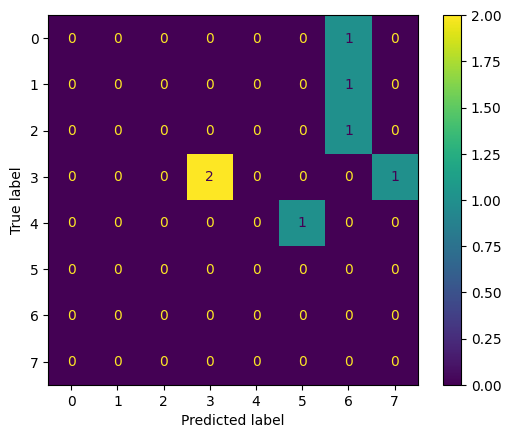

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      0.67      0.80         3
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

    accuracy                           0.29         7
   macro avg       0.12      0.08      0.10         7
weighted avg       0.43      0.29      0.34         7



C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetric

In [29]:
# TRAIN MODEL WITH ALL DATA FOR PRODUCTION
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(x)
x_tfidf = tfidf_vect.transform(x)

pdn_lr_model = LogisticRegression(C=best_c).fit(x_tfidf, y)

In [30]:
pdn_lr_model

LogisticRegression(C=1000)

In [31]:
# "SAVE FINAL MODEL"
pickle.dump(pdn_lr_model, open('data.pkl', 'wb'))
pickle.dump(tfidf_vect, open('vocabulary.pkl', 'wb'))
pickle.dump(intent_names, open('tag_name.pkl', 'wb'))